In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle

In [12]:
images = pickle.load(open('images2.pickle', 'rb'))
labels = pickle.load(open('labels.pickle', 'rb'))

In [13]:
images = images.reshape(images.shape[0], images.shape[1],images.shape[2],1)
images.shape

(327, 480, 640, 1)

In [31]:
train_images = images[:280]
test_images = images[281:]
train_labels = labels[:280]
test_labels = labels[281:]

In [36]:
hists = []

In [47]:
def plot_history(hist):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    print("lowest val loss: {}".format(np.min(hist.history['val_loss'])))
    plt.subplot(1,2,2)
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    print("lowest val acc: {}".format(np.max(hist.history['val_acc'])))

In [48]:
model= tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, strides=(2,2), kernel_size=(3,3), input_shape=images.shape[1:]),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(64, strides=(2,2), kernel_size=(3,3), input_shape=images.shape[1:]),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(256, strides=(2,2), kernel_size=(3,3), input_shape=images.shape[1:]),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.train.AdamOptimizer(), metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 239, 319, 32)      320       
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 119, 159, 32)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 59, 79, 64)        18496     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 29, 39, 64)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 14, 19, 256)       147712    
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 7, 9, 256)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 16128)             0         
__________

In [ ]:
hists.append(model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels)))

Train on 280 samples, validate on 46 samples
Epoch 1/50
280/280 [==============================] - 2s 8ms/step - loss: 1.9476 - acc: 0.1893 - val_loss: 1.8476 - val_acc: 0.2391
Epoch 2/50
280/280 [==============================] - 2s 5ms/step - loss: 1.8546 - acc: 0.2571 - val_loss: 1.8084 - val_acc: 0.2826
Epoch 3/50
280/280 [==============================] - 1s 5ms/step - loss: 1.8358 - acc: 0.1821 - val_loss: 1.8312 - val_acc: 0.2174
Epoch 4/50
280/280 [==============================] - 1s 5ms/step - loss: 1.8405 - acc: 0.2536 - val_loss: 1.7968 - val_acc: 0.2391
Epoch 5/50
280/280 [==============================] - 1s 5ms/step - loss: 1.7783 - acc: 0.2714 - val_loss: 1.7805 - val_acc: 0.2391
Epoch 6/50
280/280 [==============================] - 1s 5ms/step - loss: 1.7367 - acc: 0.3071 - val_loss: 1.7997 - val_acc: 0.2174
Epoch 7/50
280/280 [==============================] - 1s 5ms/step - loss: 1.7382 - acc: 0.3036 - val_loss: 1.7501 - val_acc: 0.2391
Epoch 8/50
280/280 [===========

lowest val loss: 1.545600061831267
lowest val acc: 0.4347826164701711


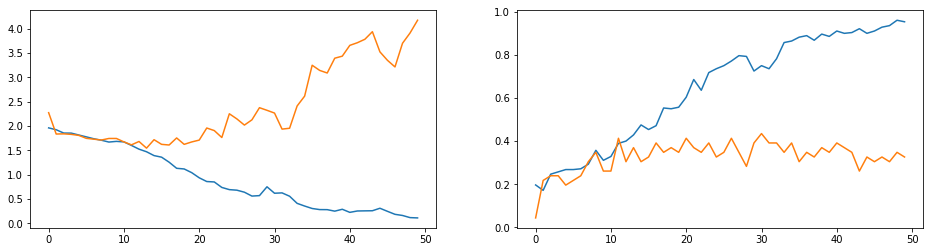

In [46]:
plot_history(hists[0])